In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('C:/Users/Adinath/Desktop/Data_Science/Assignments/Support Vector Machines/forestfires.csv')
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
dataset.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [4]:
dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataset.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace =True)

In [5]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
corr = dataset.corr(method='pearson')
print("Correlation of the Dataset:",corr)

Correlation of the Dataset:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.0593

Plotting correlation:


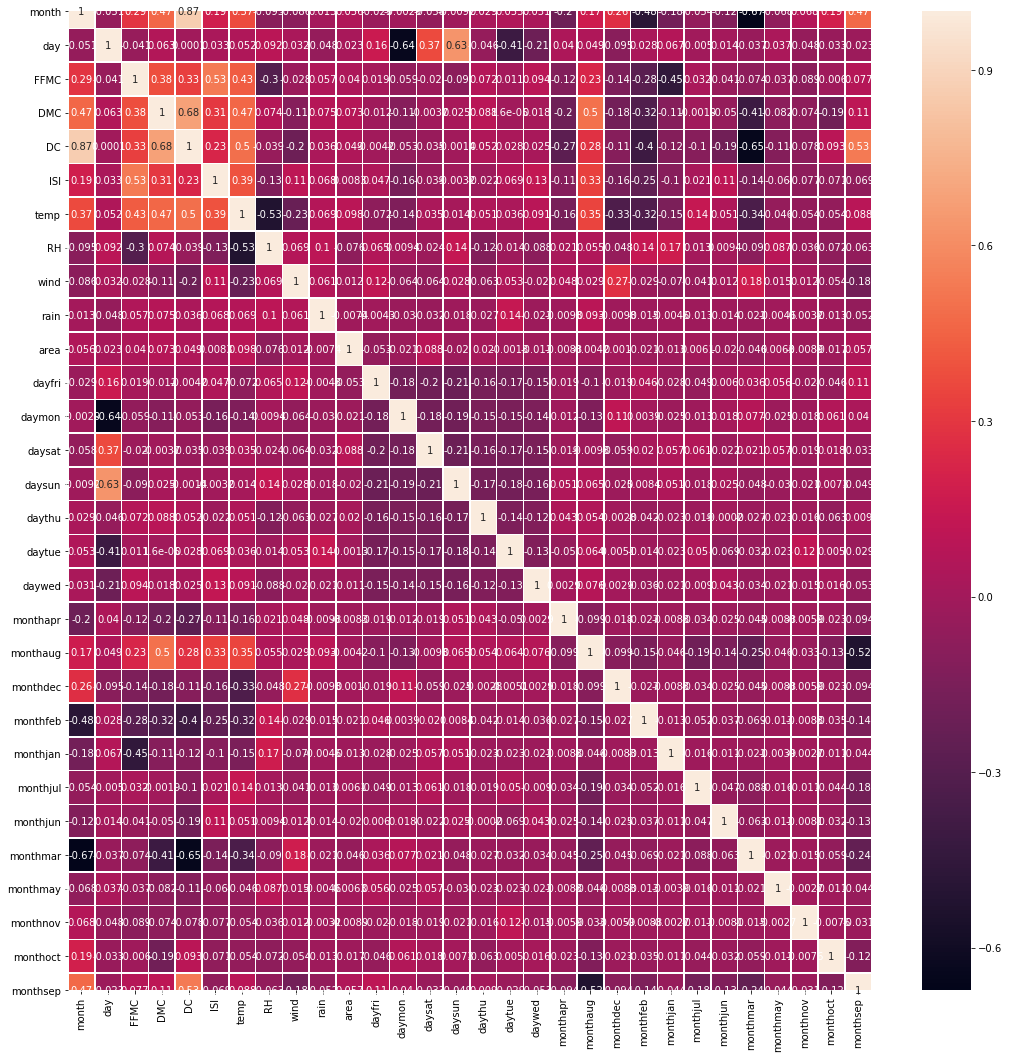

In [7]:
f,ax = plt.subplots(figsize=(18, 18))
print("Plotting correlation:")
sns.heatmap(corr,annot= True, linewidths=.5)

In [8]:
data = dataset.values

X = data[:,0:12]
Y = data[:,12]

In [9]:
extraTreesRegressor = ExtraTreesRegressor()
rfe = RFE(extraTreesRegressor,5)
fit = rfe.fit(X,Y)

print("The number of features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Rankings:", fit.ranking_)

The number of features: 5
Selected Features: [False  True False False False False False False  True  True  True  True]
Feature Rankings: [8 1 7 6 5 2 4 3 1 1 1 1]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234D4497308>,
      dtype=object)

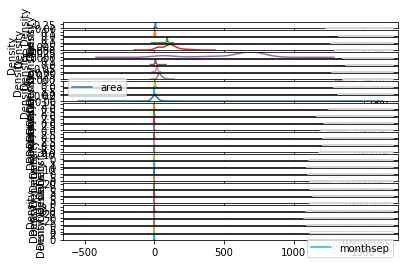

In [11]:
dataset.plot(kind='density', subplots=True)

In [12]:
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Linear Regression
Score: 0.4475331812523399
Mean Absolute Error: 0.20141981296117709


In [ ]:
print("Lasso Regression")
lasso = Lasso()
lasso.fit(X,Y)
prediction_lasso = lasso.predict(X)
score = explained_variance_score(Y, prediction_lasso)
mae = mean_absolute_error(prediction_lasso, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

In [13]:
print("Ridge Regression")
ridge = Ridge()
ridge.fit(X,Y)
prediction_ridge = ridge.predict(X)
score = explained_variance_score(Y, prediction_ridge)
mae = mean_absolute_error(prediction_ridge, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Ridge Regression
Score: 0.44753051986163594
Mean Absolute Error: 0.20139993919264923


In [14]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

K-Neighbors Regressor
Score: 0.38935757427856754
Mean Absolute Error: 0.1485493230174081


In [15]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Random Forest Regressor
Score: 1.0
Mean Absolute Error: 0.0


In [16]:
print('Support Vector Regressor')
svr = SVR()
svr.fit(X,Y)
prediction_svr = svr.predict(X)
score = explained_variance_score(Y, prediction_svr)
mae = mean_absolute_error(prediction_svr, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Support Vector Regressor
Score: 0.007163940345139785
Mean Absolute Error: 0.21309038140074274
